<a href="https://colab.research.google.com/github/aronbarbosag/ml-experiments/blob/main/modelo_student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo Student Performance

---


##### fonte: https://www.kaggle.com/datasets/ayeshasiddiqa123/student-perfirmance

# Importando bibliotecas iniciais

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importação do dataset e analise inicial

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [3]:
df = pd.read_csv('/gdrive/MyDrive/Linguagens de programacao/aula01/dataset/StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [5]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [6]:
df[df['Parental_Education_Level'].isna()]

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
240,15,87,Low,Medium,No,4,54,Medium,Yes,1,Medium,Medium,Public,Neutral,6,No,NaN,Moderate,Male,65
408,21,65,High,High,No,7,88,Low,Yes,2,Low,Medium,Private,Neutral,1,No,NaN,Near,Male,65
417,21,91,High,Medium,No,9,74,Medium,Yes,2,Low,Low,Private,Negative,2,No,NaN,Near,Female,69
451,26,94,High,Medium,Yes,10,54,Low,Yes,2,High,Medium,Public,Neutral,5,No,NaN,Near,Male,73
592,23,85,High,Low,Yes,6,59,Low,Yes,1,Medium,Medium,Public,Negative,1,No,NaN,Near,Male,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6253,22,85,High,Medium,Yes,6,96,Medium,Yes,0,Low,Medium,Public,Neutral,3,No,NaN,Moderate,Female,69
6323,28,72,Low,High,No,8,63,Low,Yes,1,Low,High,Public,Neutral,2,No,NaN,Near,Male,66
6411,19,92,High,Medium,No,6,70,High,Yes,2,Medium,Medium,Private,Negative,3,No,NaN,Near,Female,71
6423,21,70,Medium,High,Yes,5,62,Medium,Yes,2,Low,High,Public,Neutral,2,No,NaN,Near,Female,66


### Tratando dados ausentes

In [7]:
df_eda = df.copy()
df_bucket=df.copy()

#### Susbstituindo valores NaN da coluna Parental Education Level pela moda

In [8]:
df_eda = df_eda.fillna(value={"Parental_Education_Level":df_eda["Parental_Education_Level"].mode()[0]})


In [9]:
df_eda.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


#### Susbstituindo valores NaN da coluna Teacher Quality pela moda

In [10]:
df_eda = df_eda.fillna(value={"Teacher_Quality":df_eda["Teacher_Quality"].mode()[0]})

In [11]:
df_eda.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


#### Susbstituindo valores NaN da coluna Distance from Home pela moda

In [12]:
df_eda = df_eda.fillna(value={"Distance_from_Home":df_eda["Distance_from_Home"].mode()[0]})

In [13]:
df_eda.isnull().sum().sort_values(ascending=False)

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [14]:
df_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6607.0,2.967610,1.031231,0.0,2.0,3.0,4.0,6.0
Exam_Score,6607.0,67.235659,3.890456,55.0,65.0,67.0,69.0,101.0


In [15]:
df_eda.describe(include='object').T

,count,unique,top,freq
Parental_Involvement,6607,3,Medium,3362
Access_to_Resources,6607,3,Medium,3319
Extracurricular_Activities,6607,2,Yes,3938
Motivation_Level,6607,3,Medium,3351
Internet_Access,6607,2,Yes,6108
Family_Income,6607,3,Low,2672
Teacher_Quality,6607,3,Medium,4003
School_Type,6607,2,Public,4598
Peer_Influence,6607,3,Positive,2638
Learning_Disabilities,6607,2,No,5912


### Analise de outliers

In [16]:
numeric_columns=df_eda.describe().columns
numeric_columns

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')

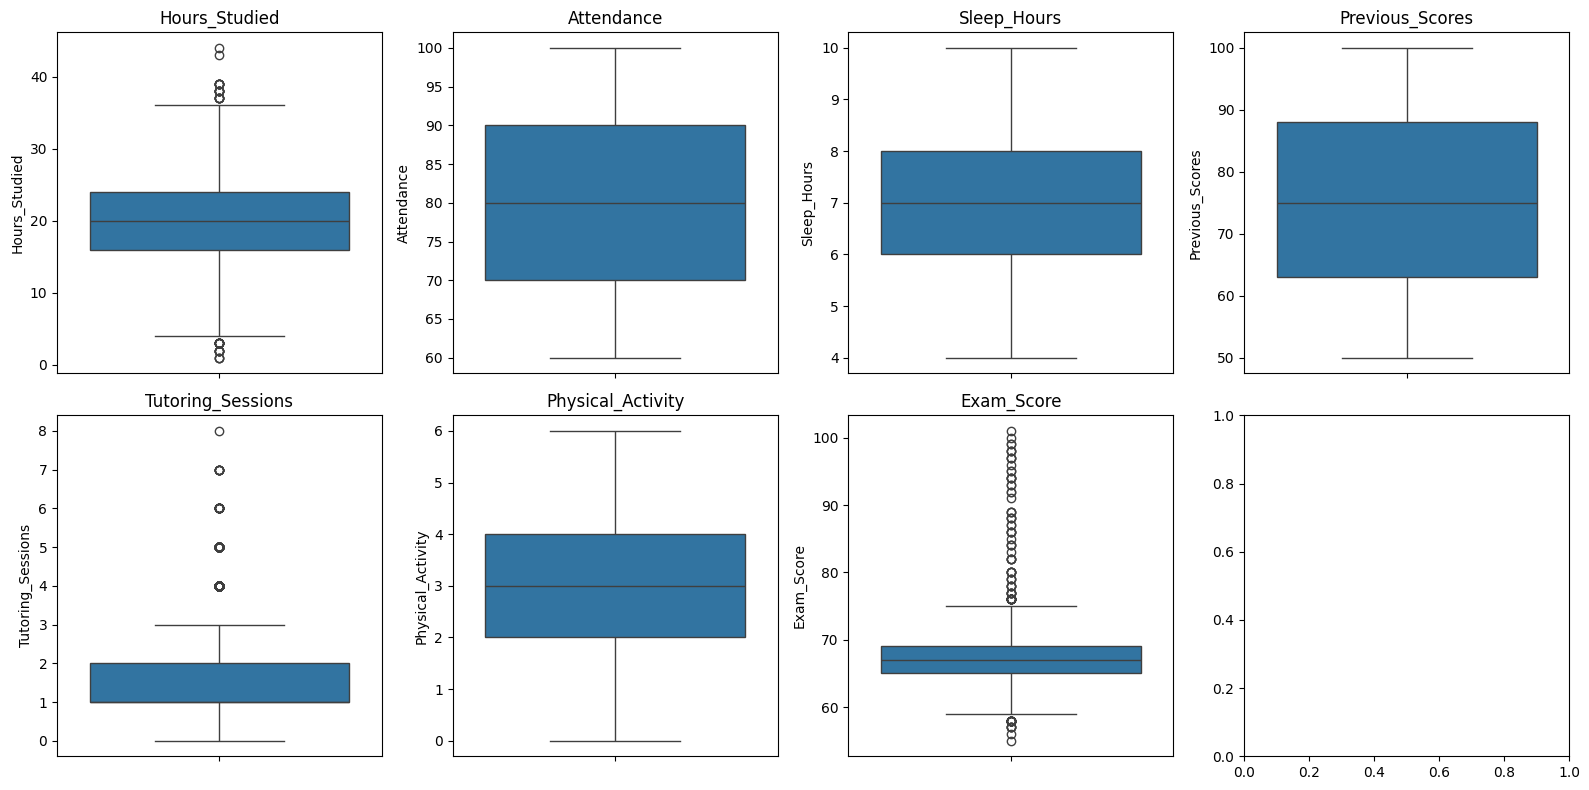

In [17]:
fig, axes =plt.subplots(ncols=4,nrows=2, figsize=(16,8))
axes=axes.flatten()
for i, column in  enumerate(numeric_columns):
  sns.boxplot(data=df_eda,y=column,ax=axes[i])
  axes[i].set_title(column)

fig.tight_layout()




### Análise quantitativo de outliers

In [18]:
iqr = df_eda['Exam_Score'].quantile(0.75) - df_eda['Exam_Score'].quantile(0.25)
limite_superior = df_eda['Exam_Score'].quantile(0.75) + 1.5*iqr
limite_inferior = df_eda['Exam_Score'].quantile(0.25) - 1.5*iqr
df_eda[(df_eda['Exam_Score']>limite_superior) |(df_eda['Exam_Score']<limite_inferior) ]
df_eda = df_eda.drop(index=(df_eda[(df_eda['Exam_Score']>limite_superior) |(df_eda['Exam_Score']<limite_inferior) ].index))

**Observação**: 104 outliers para um dataframe de 6k+ de linhas, a quantidade é muito inferior a 5% dos dados. A exclusão desses dados pouco afetaria o erro do modelo.

In [19]:
colunas_categoricas_ordinais = ["Parental_Involvement","Access_to_Resources","Motivation_Level","Family_Income","Teacher_Quality","Distance_from_Home"]
colunas_categoricas_nao_ordinais = ["Extracurricular_Activities","Internet_Access","School_Type","Peer_Influence","Learning_Disabilities","Parental_Education_Level","Gender"]


In [20]:
!pip install pingouin

In [21]:
import pingouin as pg

In [22]:
import seaborn as sns

In [23]:
#Plotando boxplot com o seaborn
# sns.boxplot(data=df_eda,x='Internet_Access',y='Exam_Score')


In [24]:
import plotly.express as pp

In [25]:
pp.box(data_frame=df_eda,x='Internet_Access',y='Exam_Score',color='Internet_Access')

In [26]:
from scipy.stats import mannwhitneyu

g_yes = df[df["Internet_Access"] == "Yes"]["Exam_Score"]
g_no  = df[df["Internet_Access"] == "No"]["Exam_Score"]

stat, p = mannwhitneyu(g_yes, g_no, alternative="two-sided")
stat, p

(np.float64(1730783.5), np.float64(4.009168741360511e-07))

In [27]:
df_krusfal = pg.kruskal(df,dv='Exam_Score',between='Internet_Access')
df_krusfal

,Source,ddof1,H,p-unc
Kruskal,Internet_Access,1,25.690038,4.008911e-07


In [28]:
pd.crosstab(df_eda['Exam_Score'],df_eda['Internet_Access'], margins=True)


Internet_Access,No,Yes,All
Exam_Score,,,
59,6,34,40
60,11,66,77
61,12,159,171
62,28,236,264
63,38,333,371
64,43,458,501
65,59,620,679
66,64,687,751
67,50,667,717


In [29]:
df_eda[colunas_categoricas_ordinais]

,Parental_Involvement,Access_to_Resources,Motivation_Level,Family_Income,Teacher_Quality,Distance_from_Home
0,Low,High,Low,Low,Medium,Near
1,Low,Medium,Low,Medium,Medium,Moderate
2,Medium,Medium,Medium,Medium,Medium,Near
3,Low,Medium,Medium,Medium,Medium,Moderate
4,Medium,Medium,Medium,Medium,High,Near
...,...,...,...,...,...,...
6602,High,Medium,Medium,High,Medium,Near
6603,High,Medium,Medium,Low,High,Near
6604,Medium,Low,Low,Low,Medium,Near
6605,High,High,High,Low,Medium,Far


In [30]:
mapeamento_low_med_hi = {
    "Low":1,
    "Medium":2,
    "High":3,
    "Near":1,
    "Moderate":2,
    "Far":3
}


for col in colunas_categoricas_ordinais:
  df_eda[col] = df_eda[col].map(mapeamento_low_med_hi)

In [31]:
df_eda[colunas_categoricas_ordinais]

,Parental_Involvement,Access_to_Resources,Motivation_Level,Family_Income,Teacher_Quality,Distance_from_Home
0,1,3,1,1,2,1
1,1,2,1,2,2,2
2,2,2,2,2,2,1
3,1,2,2,2,2,2
4,2,2,2,2,3,1
...,...,...,...,...,...,...
6602,3,2,2,3,2,1
6603,3,2,2,1,3,1
6604,2,1,1,1,2,1
6605,3,3,3,1,2,3


In [32]:
df_eda.shape

(6503, 20)

In [33]:
df_eda=pd.get_dummies(df_eda,columns=colunas_categoricas_nao_ordinais,dtype=int)

In [34]:
df_eda.shape

(6503, 29)

<Axes: >

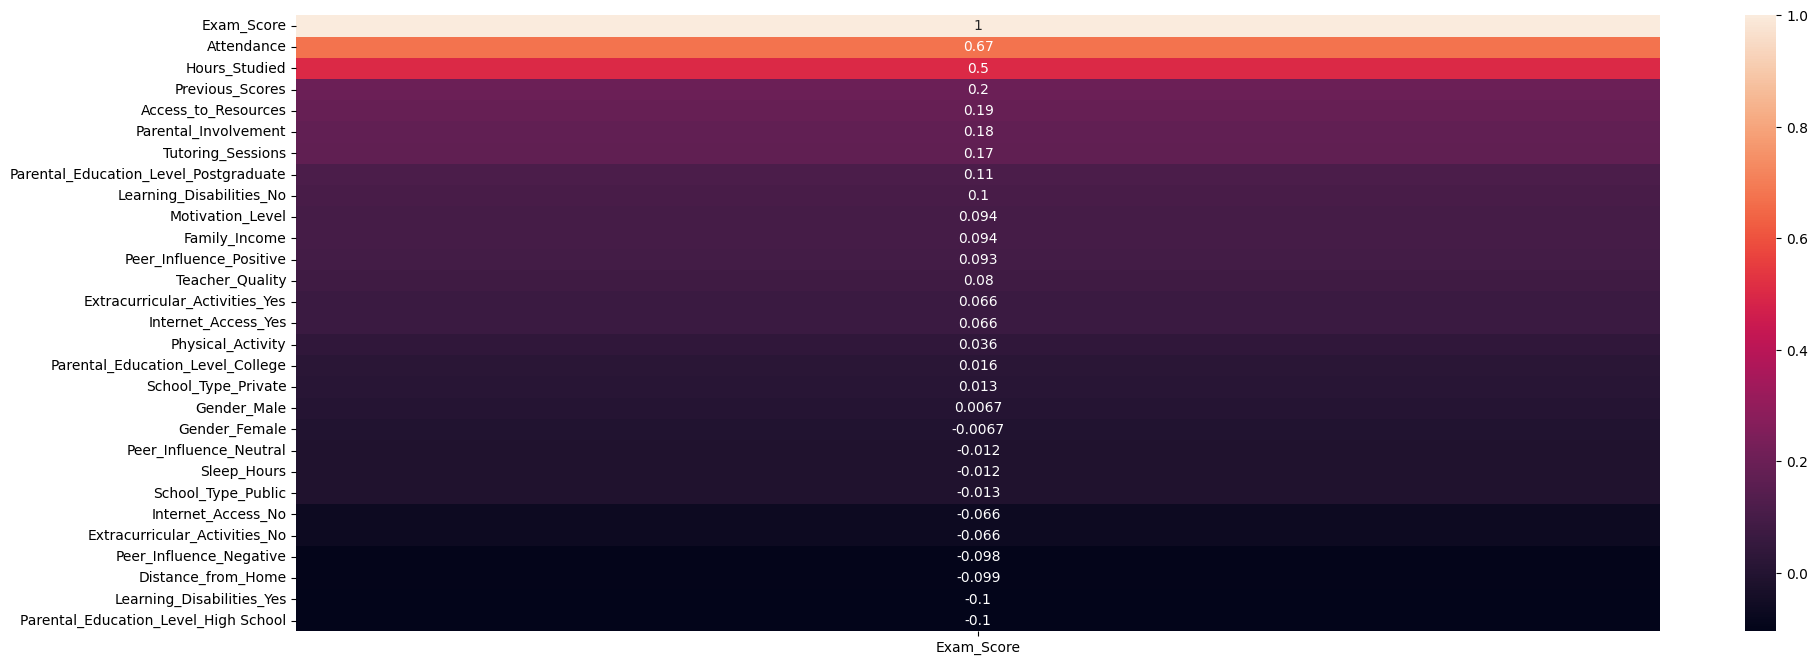

In [35]:
from matplotlib.colors import Normalize
plt.figure(figsize=(22,8))
sns.heatmap(data=df_eda.corr()[['Exam_Score']].sort_values(by='Exam_Score',ascending=False),annot=True,norm=Normalize())


<Axes: >

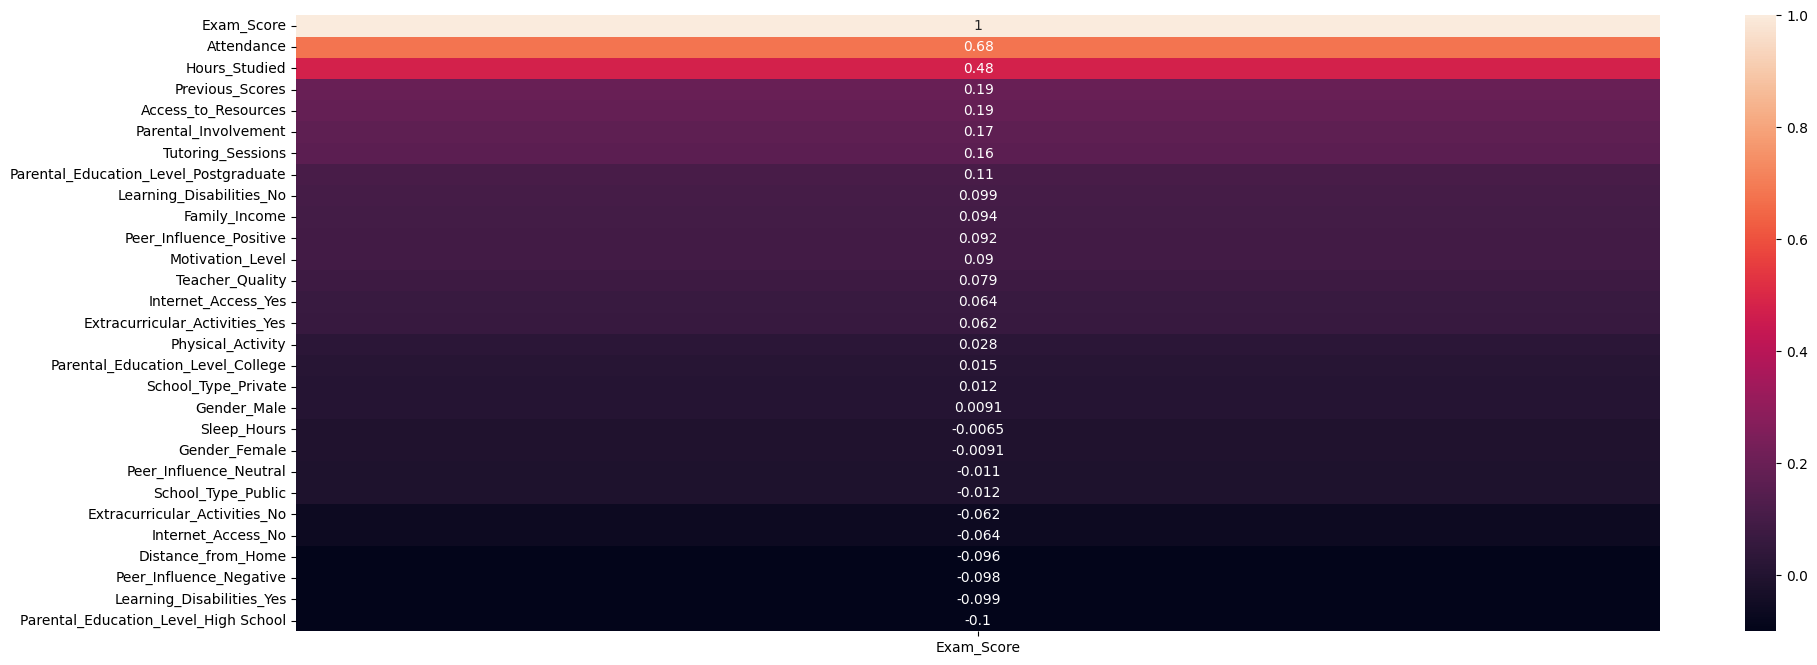

In [36]:
plt.figure(figsize=(22,8))
sns.heatmap(data=df_eda.corr(method='spearman')[['Exam_Score']].sort_values(by='Exam_Score',ascending=False),annot=True,norm=Normalize())

<Axes: xlabel='Attendance', ylabel='Exam_Score'>

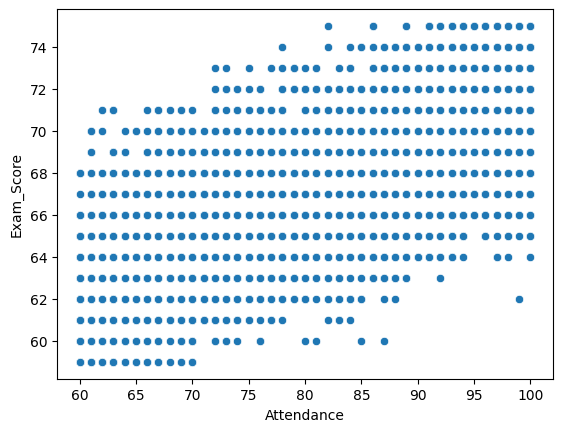

In [37]:
sns.scatterplot(data=df_eda,x='Attendance',y='Exam_Score')

<Axes: xlabel='Hours_Studied', ylabel='Exam_Score'>

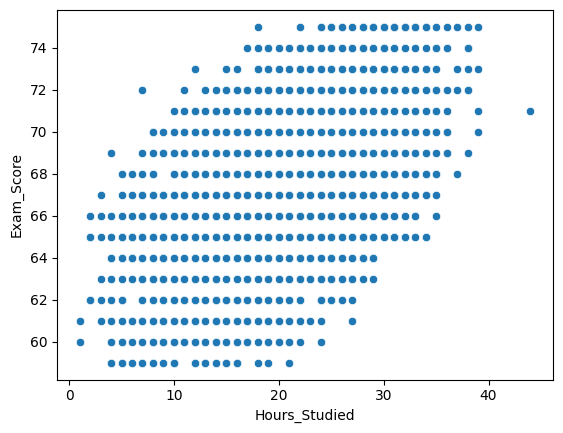

In [38]:
sns.scatterplot(data=df_eda,x='Hours_Studied',y='Exam_Score')

<Axes: xlabel='Previous_Scores', ylabel='Exam_Score'>

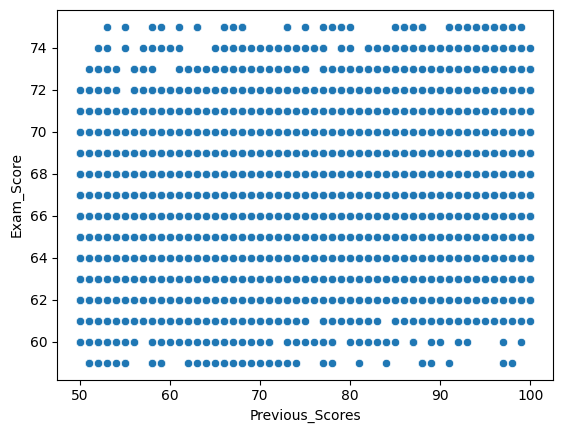

In [39]:
sns.scatterplot(data=df_eda,x='Previous_Scores',y='Exam_Score')

In [40]:
df_eda.info(
)

<class 'pandas.core.frame.DataFrame'>
Index: 6503 entries, 0 to 6606
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Hours_Studied                          6503 non-null   int64
 1   Attendance                             6503 non-null   int64
 2   Parental_Involvement                   6503 non-null   int64
 3   Access_to_Resources                    6503 non-null   int64
 4   Sleep_Hours                            6503 non-null   int64
 5   Previous_Scores                        6503 non-null   int64
 6   Motivation_Level                       6503 non-null   int64
 7   Tutoring_Sessions                      6503 non-null   int64
 8   Family_Income                          6503 non-null   int64
 9   Teacher_Quality                        6503 non-null   int64
 10  Physical_Activity                      6503 non-null   int64
 11  Distance_from_Home                 

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

In [42]:
X = df_eda.drop(columns='Exam_Score')
y = df_eda['Exam_Score']

In [43]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=51)

In [44]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [45]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled,y_train)

LinearRegression()

In [46]:
X_test_scaled = scaler.transform(X_test)

In [47]:
y_pred=linear_model.predict(X_test_scaled)

In [48]:
r2_score(y_test,y_pred)

0.9895232276833305

In [49]:
mean_absolute_error(y_test,y_pred)

0.2784981868882842

In [50]:
root_mean_squared_error(y_test,y_pred)

0.3299937139903971

In [51]:
residuos = y_test - y_pred

In [52]:
from scipy.stats import shapiro, kstest, zscore


In [53]:
residuos_std = zscore(residuos)

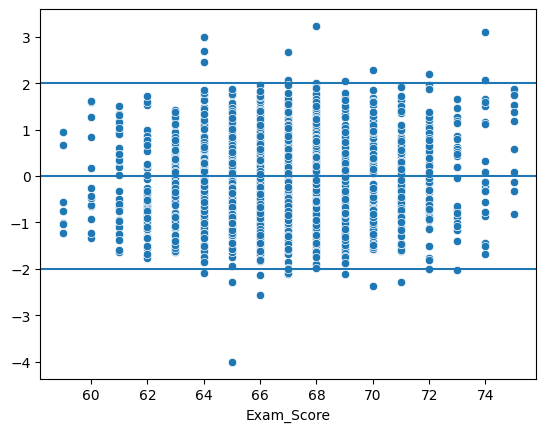

In [54]:
sns.scatterplot(x=y_test,y=residuos_std)
plt.axhline(y=2)
plt.axhline(y=0)
plt.axhline(y=-2)

<Axes: xlabel='Exam_Score'>

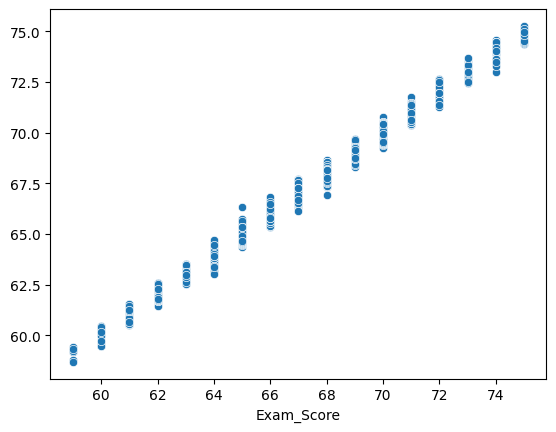

In [55]:
sns.scatterplot(x=y_test,y=y_pred)



In [56]:
df_shapiro = shapiro(residuos)

In [57]:
df_shapiro

ShapiroResult(statistic=np.float64(0.9876588491114316), pvalue=np.float64(4.859967225388059e-09))

Teste de Shapiro wilk indica que os residuos nao seguem uma distribuição normal

In [58]:
df_kolmorogov_smirnov = kstest(residuos,cdf='norm')
df_kolmorogov_smirnov

KstestResult(statistic=np.float64(0.2611893687078103), pvalue=np.float64(8.576689905223165e-79), statistic_location=np.float64(-0.5455036409572784), statistic_sign=np.int8(-1))

Teste de Kolmorogov smirnov indica que os residuos nao seguem uma distribuição normal

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

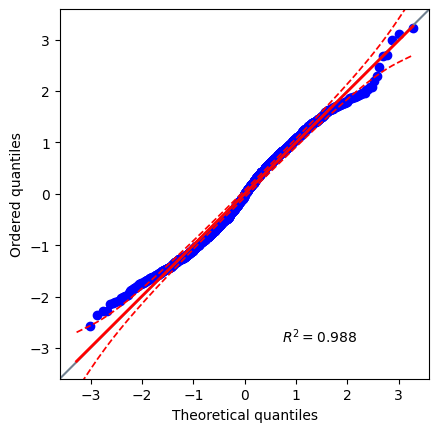

In [59]:
import pingouin as pg
pg.qqplot(residuos_std,dist='norm',confidence=0.95)

Mais uma confirmação de que os residuos não seguem uma distribuição normal

<Axes: xlabel='Exam_Score', ylabel='Count'>

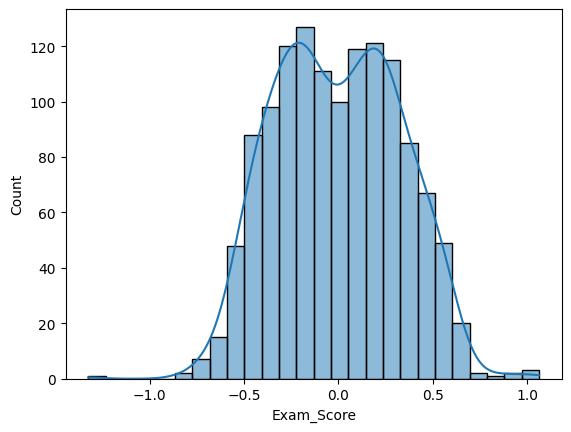

In [60]:
sns.histplot(residuos,kde=True)

In [61]:
df_test_predict=df_eda.sample(1,random_state=41)
df_test_predict

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,...,Peer_Influence_Negative,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_No,Learning_Disabilities_Yes,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Gender_Female,Gender_Male
1021,17,87,2,2,5,60,2,4,2,2,...,0,0,1,0,1,0,1,0,1,0


In [62]:
df_test_predict.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 1021 to 1021
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Hours_Studied                          1 non-null      int64
 1   Attendance                             1 non-null      int64
 2   Parental_Involvement                   1 non-null      int64
 3   Access_to_Resources                    1 non-null      int64
 4   Sleep_Hours                            1 non-null      int64
 5   Previous_Scores                        1 non-null      int64
 6   Motivation_Level                       1 non-null      int64
 7   Tutoring_Sessions                      1 non-null      int64
 8   Family_Income                          1 non-null      int64
 9   Teacher_Quality                        1 non-null      int64
 10  Physical_Activity                      1 non-null      int64
 11  Distance_from_Home                 

In [63]:
df_test_predict['Exam_Score']

,Exam_Score
1021,67


In [64]:
df_test_predict_features = df_test_predict.drop(columns='Exam_Score')

In [65]:
df_test_predict_features_scaled = scaler.transform(df_test_predict_features)

In [66]:
new_y_pred=linear_model.predict(df_test_predict_features_scaled)
new_y_pred

array([67.61144003])

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.impute import SimpleImputer

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [69]:
df.describe(include='object').T

,count,unique,top,freq
Parental_Involvement,6607,3,Medium,3362
Access_to_Resources,6607,3,Medium,3319
Extracurricular_Activities,6607,2,Yes,3938
Motivation_Level,6607,3,Medium,3351
Internet_Access,6607,2,Yes,6108
Family_Income,6607,3,Low,2672
Teacher_Quality,6529,3,Medium,3925
School_Type,6607,2,Public,4598
Peer_Influence,6607,3,Positive,2638
Learning_Disabilities,6607,2,No,5912


In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6607.0,2.967610,1.031231,0.0,2.0,3.0,4.0,6.0
Exam_Score,6607.0,67.235659,3.890456,55.0,65.0,67.0,69.0,101.0


In [71]:
cat_cols = ["Gender","Learning_Disabilities","School_Type","Internet_Access","Extracurricular_Activities","Parental_Education_Level","Peer_Influence",]
ord_cols = ["Teacher_Quality","Family_Income","Motivation_Level","Access_to_Resources","Parental_Involvement","Distance_from_Home"]
# ord_cols_dist = ["Distance_from_Home"]
numeric_cols = ["Hours_Studied","Attendance","Sleep_Hours","Previous_Scores","Tutoring_Sessions","Physical_Activity"]

In [72]:
def eliminar_outliers_do_target(dataframe:pd.DataFrame):
  iqr = dataframe['Exam_Score'].quantile(0.75) - dataframe['Exam_Score'].quantile(0.25)
  limite_superior = dataframe['Exam_Score'].quantile(0.75) + 1.5*iqr
  limite_inferior = dataframe['Exam_Score'].quantile(0.25) - 1.5*iqr
  index_target=dataframe[(dataframe['Exam_Score']>limite_superior) |(dataframe['Exam_Score']<limite_inferior) ]
  dataframe = dataframe.drop(index=(index_target.index))
  return True

In [73]:
eliminar_outliers_do_target(df)

True

In [74]:
cat_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoder',OneHotEncoder(handle_unknown='ignore'))

])


ord_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder',OrdinalEncoder(
        categories=[["Low","Medium","High"],["Low","Medium","High"],["Low","Medium","High"],["Low","Medium","High"],["Low","Medium","High"],
                    ["Near","Moderate","Far"]],
        handle_unknown='error'
    ))
])


# ord_transformer_dist = Pipeline(steps=[
#     ('imputer',SimpleImputer(strategy='most_frequent')),
#     ('ordinal_encoder',OrdinalEncoder(
#         categories=[["Near","Moderate","Far"]],
#         handle_unknown='error'
#     ))
# ])

numeric_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers = [
        ('num',numeric_transformer,numeric_cols),
        ('cat',cat_transformer,cat_cols),
        ('ord',ord_transformer,ord_cols)

    ]
)


model_pipe_linear = Pipeline(
    steps=[
        ('preprocessor',preprocessor),
        ('regressor',LinearRegression())
    ]
)

# "Low":1,
#     "Medium":2,
#     "High":3,
#     "Near":1,
#     "Moderate":2,
#     "Far":3

In [75]:
X = df.drop(columns=['Exam_Score'])
y = df['Exam_Score']

In [76]:
model_pipe_linear.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Hours_Studied',
                                                   'Attendance', 'Sleep_Hours',
                                                   'Previous_Scores',
                                                   'Tutoring_Sessions',
                                                   'Physical_Activity']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot...
                                                                  ('ordinal_encoder',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Low',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Low',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Low',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Low',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Near',
                                                                                               'Moderate',
                                                                                               'Far']]))]),
                                                  ['Teacher_Quality',
                                                   'Family_Income',
                                                   'Motivation_Level',
                                                   'Access_to_Resources',
                                                   'Parental_Involvement',
                                                   'Distance_from_Home'])])),
                ('regressor', LinearRegression())])

In [77]:
df_test_predict_pipe=df.sample(1,random_state=114)
df_test_predict_pipe

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
678,26,61,Low,Medium,Yes,5,51,High,Yes,0,Low,Medium,Private,Neutral,5,No,High School,Moderate,Female,62


In [78]:
X_test_predict_pipe = df_test_predict_pipe.drop(columns=['Exam_Score'])

In [79]:
model_pipe_linear.predict(X_test_predict_pipe)

array([62.29050079])

In [80]:
import joblib

In [81]:
joblib.dump(model_pipe_linear,"./linear_model.pkl")

['./linear_model.pkl']